<a href="https://colab.research.google.com/github/CobaMasa/PythonMachineLearningProgramming/blob/master/chapter3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machine

In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
# plot_decision_regions
## Improving plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test test')

### Intuitive understanding
In SVM, we're gonna searching for the best hyperplace that split feature space well.

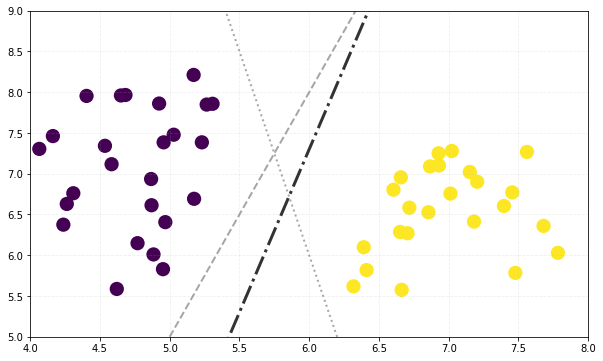

In [3]:
from sklearn.datasets import make_blobs
# data
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=0.5, center_box=(0, 8), random_state=20)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=150, linewidth=2, cmap='viridis')

## margins
x = np.linspace(5, 7, 50)
plt.plot(x, 3*x-10, lw=2, ls='--', c='gray', alpha=0.7)
plt.plot(x, -5*x+36, lw=2, ls=':', c='gray', alpha=0.7)
plt.plot(x, 4*x-16.7, lw=3, ls='-.', c='black', alpha=0.8)

plt.xlim(4, 8)
plt.ylim(5, 9)
plt.grid(ls='--', alpha=0.2)
plt.show()

In [4]:
# hands-on svm
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
iris = load_iris()
X_std = sc.fit_transform(iris.data)[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
print('acc: {:.6f}'.format(svm.score(X_test, y_test)))

acc: 0.955556


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


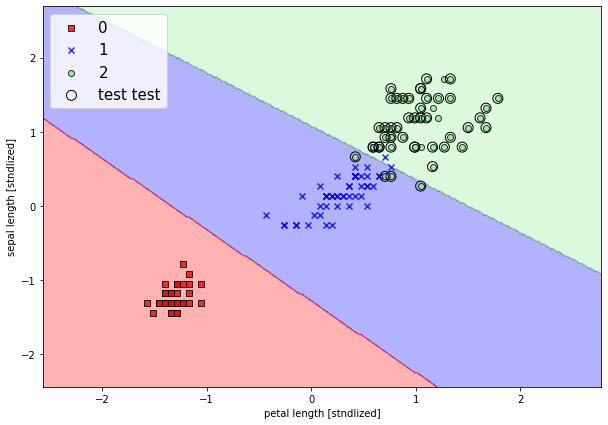

In [5]:
# plot the result
fig = plt.figure(figsize=(10,  7))
plot_decision_regions(X_std, y, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [stndlized]')
plt.ylabel('sepal length [stndlized]')
plt.legend(loc='upper left', fontsize=15)

### (additional) Complimentary for SVM & Logistic Regression

lr acc: 0.911111
svm acc: 0.933333


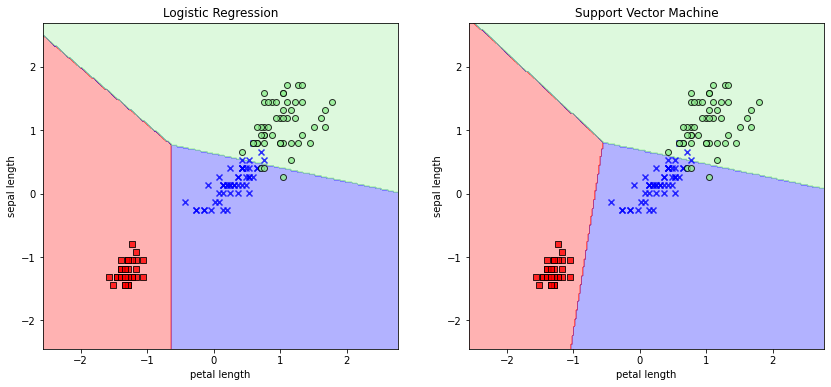

In [6]:
# we can use sklearn.linear_model.SGDClassifier instead of batch learning of SVM & Logistic Regression
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## make them learn data
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
print('lr acc: {:.6f}'.format(lr.score(X_test, y_test)))
print('svm acc: {:.6f}'.format(svm.score(X_test, y_test)))

fig = plt.figure(figsize=(14, 6))
gs = plt.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[:, 0])
plot_decision_regions(X_std, y, classifier=lr)
ax1.set(xlabel='petal length', ylabel='sepal length', title='Logistic Regression')

ax2 = fig.add_subplot(gs[:, 1])
plot_decision_regions(X_std, y, classifier=svm)
ax2.set(xlabel='petal length', ylabel='sepal length', title='Support Vector Machine')

plt.show();
# some belong to wring area but accuracy (sometimes) shows 1.0 due to not implimenting validation.

## Non-linear problems with Kernel SVM

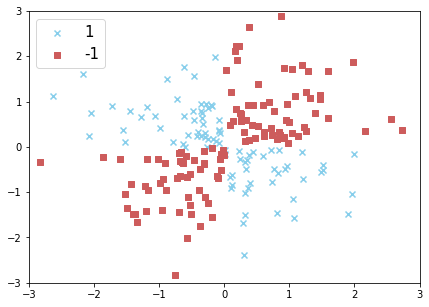

In [7]:
# generate xor data
X = np.random.randn(200, 2)
y_xor = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y_xor = np.where(y_xor, 1, -1)

# scatter them
fig = plt.figure(figsize=(7, 5))
plt.scatter(X[y_xor==1, 0], X[y_xor==1, 1], c='skyblue', label='1', marker='x')
plt.scatter(X[y_xor==-1, 0], X[y_xor==-1, 1], c='indianred', label='-1', marker='s')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend(fontsize=15)
plt.show();

acc: 0.933333
acc: 0.911111


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


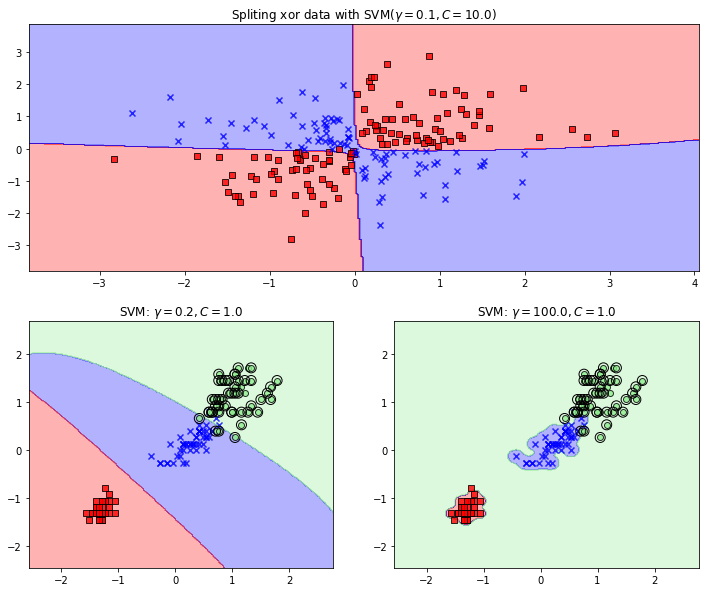

In [8]:
## applying rbf kernel
svm = SVC(kernel='rbf', gamma=0.10, C=10.0)
svm.fit(X, y_xor)

fig = plt.figure(figsize=(12, 10))
gs = plt.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
plot_decision_regions(X, y_xor, classifier=svm)
ax1.set_title('Spliting xor data with SVM($\gamma=0.1, C=10.0$)')

## and adapting to iris
svm = SVC(kernel='rbf', gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
print('acc: {:.6f}'.format(svm.score(X_test, y_test)))
ax2 = fig.add_subplot(gs[1, 0])
plot_decision_regions(X_std, y, classifier=svm, test_idx=range(105, 150))
ax2.set_title('SVM: $\gamma=0.2, C=1.0$')

## tune params
svm = SVC(kernel='rbf', gamma=100.0, C=1.0)
svm.fit(X_train, y_train)
print('acc: {:.6f}'.format(svm.score(X_test, y_test)))
ax3 = fig.add_subplot(gs[1, 1])
plot_decision_regions(X_std, y, classifier=svm, test_idx=range(105, 150))
ax3.set_title('SVM: $\gamma=100.0, C=1.0$')

plt.show();